# Machine Learning & Data Science A-Z: Hands-on Python 2021
sources - https://www.udemy.com/course/data-science-machine-learning-a-z-hands-on-python/

## Supervised Learning - Classification

Basic

####  Importing Useful Modules / DataSet (iris) and Make it into DataFrame

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Import iris data from sklearn datasets
from sklearn import datasets
iris = datasets.load_iris()
iris.feature_names # to know the data set discription name

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
# To change Bunch of data to Array

Data_iris = iris.data
Data_iris?

In [6]:
# To Change data Array to Data Frame with feature name colums
Data_iris = pd.DataFrame(Data_iris, columns=iris.feature_names )
Data_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
# Adding label into dataframe from iris data set
Data_iris['label'] = iris.target
Data_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


#### Scatter Plot the DataFrame

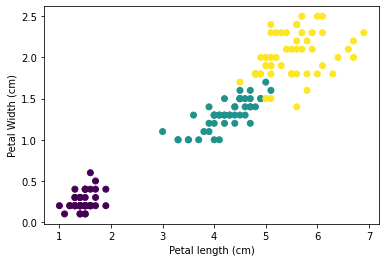

In [8]:
# PLotting the DataFrame
plt.scatter(Data_iris.iloc[:,2],Data_iris.iloc[:,3],c = iris.target) # selecting col 2 and 3
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal Width (cm)')
plt.show()

In [9]:
x = Data_iris.iloc[:,0:4] # slicing DataFrame
y = Data_iris.iloc[:,4]

### k-NN Classifier

In [10]:
# Importing k-NN from sklearn
from sklearn.neighbors import KNeighborsClassifier

In [11]:
kNN = KNeighborsClassifier(n_neighbors = 6, metric='minkowski',p =1) #Using K-NN minkwoski 
kNN.fit(x,y)

KNeighborsClassifier(n_neighbors=6, p=1)

In [12]:
# Customer give a sample exmple to find what is the nearest
x_N = np.array([[5.6,3.4,1.4,0.1]])
x_N2 = np.array([[7.5,4,5.5,2]])

In [13]:
#Used our creating Model
print('Sample 1:', kNN.predict(x_N))
print('Sample 2:',kNN.predict(x_N2))

Sample 1: [0]
Sample 2: [2]


In [14]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [18]:
# k-NN model testing

from sklearn.model_selection import train_test_split

# spliting model 80% training set - 20% test set
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, train_size=0.8, random_state=88, shuffle= True, stratify= y) # order is important

In [17]:
train_test_split??

In [21]:
kNN.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=6, p=1)

In [25]:
# testing the sample 
predict_types = kNN.predict(x_test)
predict_types

array([1, 1, 2, 2, 1, 1, 1, 2, 1, 0, 1, 2, 2, 2, 2, 0, 1, 0, 0, 0, 2, 0,
       2, 0, 0, 1, 1, 0, 1, 0])

In [28]:
from sklearn.metrics import accuracy_score

In [29]:
accuracy_score(y_test, predict_types) # to determine how good our sample with model using accuracy score

0.9666666666666667

### Decision Tree

In [31]:
# Importing decision tree classifiers and accuracy score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [34]:
# Building a DT model
Dt = DecisionTreeClassifier()
Dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [36]:
predict_types_Dt = Dt.predict(x_test)
predict_types_Dt # output for model testing

array([1, 1, 2, 2, 1, 2, 1, 2, 1, 0, 1, 2, 2, 2, 2, 0, 1, 0, 0, 0, 2, 0,
       2, 0, 0, 1, 1, 0, 1, 0])

In [37]:
accuracy_score(y_test,predict_types_Dt) #Accuracy test

1.0

#### Cross Validation

spliting training & test set by vice versa

In [39]:
# importing cross value score from sklearn model selection
from sklearn.model_selection import cross_val_score

In [41]:
Scores_Dt = cross_val_score(Dt, x,y,cv= 10)
Scores_Dt.round(2)

array([1.  , 0.93, 1.  , 0.93, 0.93, 0.87, 0.93, 0.93, 1.  , 1.  ])

### Naive Bayes 

In [42]:
# Importing Naive bayes classifier from sklearn model selecetion
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()

In [46]:
# Fitted NB and testing model
NB.fit(x_train,y_train)
predict_types_NB = NB.predict(x_test)
predict_types_NB #Output of predicted NB

array([1, 1, 2, 2, 1, 1, 1, 2, 1, 0, 1, 2, 2, 2, 2, 0, 1, 0, 0, 0, 2, 0,
       2, 0, 0, 1, 1, 0, 1, 0])

In [48]:
# Accuracy score using cross validation
Scores_NB = cross_val_score(NB,x,y,cv=10)
Scores_NB

array([0.93333333, 0.93333333, 1.        , 0.93333333, 0.93333333,
       0.93333333, 0.86666667, 1.        , 1.        , 1.        ])

### Logistic Regression

In [52]:
# importing breast cancer dataset from sklearn
from sklearn.datasets import load_breast_cancer
Data_C = load_breast_cancer()

In [53]:
# Spliting Data Set x and y
x = Data_C.data #Independent variable
y = Data_C.target # Dependent Variable

In [54]:
#Splitting data into train and test
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,train_size=0.7,random_state=88)

In [56]:
# calling logistic model from sklearn linear model and build model
from sklearn.linear_model import LogisticRegression

Lr = LogisticRegression()
Lr.fit(x_train,y_train)


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [58]:
# build predict model
predict_types_Lr = Lr.predict(x_test)
predict_types_Lr

array([1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1])

In [59]:
# Accuracy score using cross validation
Scores_Lr = cross_val_score(Lr,x,y,cv=10)
Scores_Lr

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

array([0.92982456, 0.92982456, 0.94736842, 0.92982456, 0.94736842,
       0.96491228, 0.92982456, 0.96491228, 0.96491228, 0.96428571])

In [60]:
# Accuracy score
accuracy_score(y_test,predict_types_Lr)

0.9532163742690059

In [63]:
load_breast_cancer??

In [67]:
Data_C2 = pd.DataFrame(x, columns=Data_C.feature_names )
Data_C2

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### Model Evaluation
Evaluation Metrics for Brast Cancer Data Set

In [70]:
# importing confusion metrix
from sklearn.metrics import confusion_matrix, classification_report

In [74]:
# Buil model evaluation for confusion matrix and Classification report
Conf_Mat = confusion_matrix(y_test,predict_types_Lr)
Class_rep = classification_report(y_test,predict_types_Lr)
print(Conf_Mat)
print('\n',Class_rep)

[[ 54   3]
 [  5 109]]

               precision    recall  f1-score   support

           0       0.92      0.95      0.93        57
           1       0.97      0.96      0.96       114

    accuracy                           0.95       171
   macro avg       0.94      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



In [77]:
# Import ROC-Curve and build model
from sklearn.metrics import roc_curve
y_prob = Lr.predict_proba(x_test)
y_prob.round(3)

array([[0.   , 1.   ],
       [1.   , 0.   ],
       [0.002, 0.998],
       [1.   , 0.   ],
       [0.001, 0.999],
       [0.005, 0.995],
       [0.503, 0.497],
       [0.005, 0.995],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [0.004, 0.996],
       [0.05 , 0.95 ],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [0.992, 0.008],
       [0.001, 0.999],
       [0.001, 0.999],
       [0.   , 1.   ],
       [0.   , 1.   ],
       [0.999, 0.001],
       [0.886, 0.114],
       [0.038, 0.962],
       [0.03 , 0.97 ],
       [0.002, 0.998],
       [0.   , 1.   ],
       [0.001, 0.999],
       [0.001, 0.999],
       [0.028, 0.972],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [0.3  , 0.7  ],
       [0.002, 0.998],
       [0.213, 0.787],
       [0.008, 0.992],
       [0.044, 0.956],
       [0.003, 0.997],
       [0.004, 0.996],
       [0.   , 1.   ],
       [1.   , 0.   ],
       [0.176, 0.824],
       [1.   , 0.   ],
       [0.0

In [78]:
y_prob = y_prob[:,1]
y_prob.round(3)

array([1.   , 0.   , 0.998, 0.   , 0.999, 0.995, 0.497, 0.995, 0.   ,
       0.   , 0.996, 0.95 , 0.   , 0.   , 0.   , 0.   , 0.008, 0.999,
       0.999, 1.   , 1.   , 0.001, 0.114, 0.962, 0.97 , 0.998, 1.   ,
       0.999, 0.999, 0.972, 0.   , 0.   , 0.7  , 0.998, 0.787, 0.992,
       0.956, 0.997, 0.996, 1.   , 0.   , 0.824, 0.   , 0.942, 0.049,
       0.664, 0.998, 0.92 , 0.002, 0.999, 0.998, 0.091, 0.996, 0.716,
       0.983, 1.   , 0.   , 0.997, 0.998, 0.996, 0.99 , 0.033, 0.999,
       0.959, 0.   , 0.   , 0.742, 0.97 , 0.999, 0.006, 1.   , 0.   ,
       0.996, 0.991, 0.828, 0.998, 0.995, 0.972, 0.999, 1.   , 0.   ,
       0.998, 0.954, 0.   , 0.999, 0.   , 0.944, 0.999, 0.978, 0.   ,
       0.99 , 0.991, 0.98 , 0.   , 0.   , 0.837, 0.   , 0.028, 0.975,
       0.961, 0.977, 0.952, 0.022, 0.999, 0.   , 0.666, 0.994, 0.   ,
       0.   , 0.632, 0.996, 0.182, 0.882, 0.072, 0.969, 0.948, 0.872,
       0.946, 0.998, 0.989, 0.999, 0.956, 0.002, 0.005, 1.   , 0.954,
       0.997, 0.991,

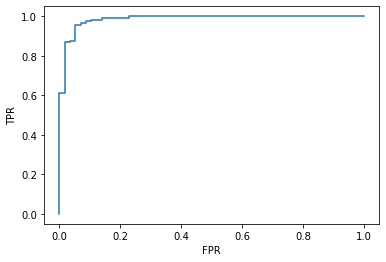

In [81]:
# FPR, TPR and Thresholds importing and plotting it

FPR, TPR, Thresholds = roc_curve(y_test,y_prob)
import matplotlib.pyplot as plt

plt.plot(FPR,TPR)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

# based on the graph the model is valid.

In [82]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_prob)
# The model have very good auc value so it is a valid model

0.9855340104647583